<a href="https://colab.research.google.com/github/Taranks7/Audio-visual_similarity/blob/main/AVIMA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages 

In [26]:
import matplotlib
import pathlib
import pandas as pd
import json
import sys
!{sys.executable} -m pip install mne
import mne


In [ ]:
matplotlib.use('Qt5Agg') # use Qt5Agg backend = best choice for MNE-Python's interactive plotting functions


Retrieve the storage location of the sample data, and download the dataset.



In [ ]:
sample_data_dir = mne.datasets.sample.data_path() # MEG and EEG recordings of audio-visual data

# Convert to a pathlib.Path
sample_data_dir = pathlib.Path(sample_data_dir)
sample_data_dir

Using default location ~/mne_data for sample...
Creating ~/mne_data



Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /root/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/root/mne_data/MNE-sample-data']
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


PosixPath('/root/mne_data/MNE-sample-data')

In [9]:
raw_path = sample_data_dir / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw(raw_path)
raw

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


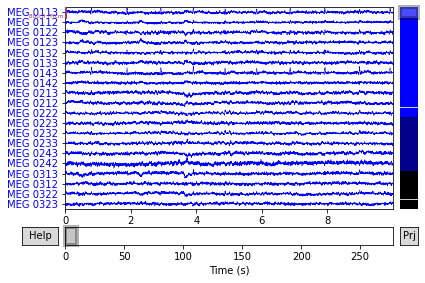

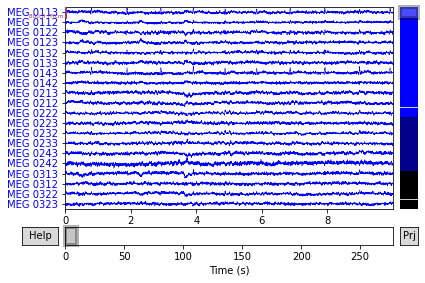

In [10]:
raw.plot() # visualise

In [23]:
# point to my data 
data_dir = "/content/sub-pilot1_ses-06_task-nback_run-01_channels.tsv"
df=pd.read_csv(data_dir, sep='\t')
df

,name,type,units,status
0,A1,EEG,V,good
1,A2,EEG,V,good
2,A3,EEG,V,good
3,A4,EEG,V,good
4,A5,EEG,V,good
...,...,...,...,...
132,EXG5,MISC,NaN,good
133,EXG6,MISC,NaN,good
134,EXG7,MISC,NaN,good
135,EXG8,MISC,NaN,good


In [30]:
json_file = "sub-pilot1_ses-06_task-nback_run-01_eeg.json"
with open(json_file, 'r') as file:
     ses6_json = json.load(file)

ses6_json

{'CapManufacturer': 'Biosemi',
 'ECGChannelCount': 0,
 'EEGChannelCount': 128,
 'EEGGround': 'CMS and DRL in central positions in cap (active electrode system)',
 'EEGPlacementScheme': 'ABCD',
 'EEGReference': 'Mastoids; left (EXG1) and right (EXG2)',
 'EMGChannelCount': 0,
 'EOGChannelCount': 1,
 'InstitutionAddress': 'Birmingham B15 2TT, UK',
 'InstitutionName': 'School of Psychology, University of Birmingham',
 'Manufacturer': 'Biosemi',
 'ManufacturersModelName': 'ActiveTwo',
 'MiscChannelCount': 5,
 'PowerLineFrequency': 50,
 'RecordingDuration': 5368.9990234375,
 'RecordingType': 'continuous',
 'SamplingFrequency': 1024,
 'SoftwareFilters': 'n/a',
 'TaskName': 'nback',
 'TriggerChannelCount': 1}